## Why does volatility in the stock market drive the median return down to 0 but keep the average return the same?

The stock market grows on average 10% percent a year. If the stock market grew exactly 10% percent every year for a century, your investment would increase 13781 fold.

But the stock market doesn't go up exactly 10% percent every year. Sometimes it's a little more, sometimes it's a little less (or as with the Coronavirus fallout right now, a lot less). 

What happens to the market and to the median investor as this volatility increases?

Let's test out different stock markets based on their volatility. So all the markets will grow a person's money on average 10% every year for a century. But the return for any given individual for any given year will be randomly pooled from a normal distribution centered around 10% and with a standard deviation determined by the volatility of the market. More volatile markets will have a higher standard deviation.

Let's test out every market that has a standard deviation of returns between 0% (you'll get 10% returns every year) to 35% (it'll be wild as shit). We'll put 250000 investors in every maket. Each of them will start with $1 and they will each get a different random return every year for a century based on how volatile their stock market is.

Would the median investor make the same amount of money in the long run across all these markets? Would the stock market as a whole rise the same?

### It seems that the returns of the median investor asymptotically approach 0 as volatility grows while volatile markets as a whole do just as well. My explanation is that in a volatile market, most people encouter a year where they loose their entire principal and can't make it up but some people get stupendously lucky, leaving the average return the same regardless of volatility.

In [1]:
import random
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.stats import skew as calc_skew
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm
import pylab
import math

In [2]:
def returns(starting_amount, avg_growth_rate, st_dev, time_horizon):
    returns = starting_amount
    growth_per_year = np.random.normal(avg_growth_rate, st_dev, time_horizon)
    for year in range(time_horizon):
        returns *= 1 + growth_per_year[year]
    return returns

In [3]:
def run_experiment(growth_rate, time_horizon, st_dev_range, ITERATIONS):
  mean, median, skew = [], [], []
  for st_dev in st_dev_range:
    sample = []
    for i in range(ITERATIONS):
      sample.append(returns(1, growth_rate, st_dev, time_horizon))
    mean.append(statistics.mean(sample))
    median.append(statistics.median(sample)) 
    skew.append(calc_skew(sample))
  return mean, median, skew

In [4]:
upper_bound = 0.35
st_dev_range = np.linspace(0, upper_bound, int(upper_bound * 100) + 1)
mean, median, skew = run_experiment(growth_rate=0.1, time_horizon=100, st_dev_range=st_dev_range, ITERATIONS=250000)

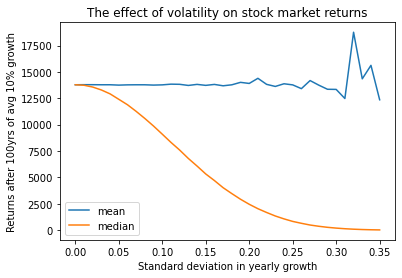

In [12]:
plt.plot(st_dev_range, mean, label='mean')
plt.plot(st_dev_range, median, label='median')
plt.title('The effect of volatility on stock market returns')
plt.legend(loc='lower left')
plt.xlabel('Standard deviation in yearly growth')
plt.ylabel('Returns after 100yrs of avg 10% growth')
plt.show()

In [13]:
def fit_and_plot(function, x, y):
    popt, pcov = curve_fit(function, x, y)
    print(popt)

    y_curve = function(x, *popt)

    pylab.plot(x, y, 'o', label='data')
    pylab.plot(x, y_curve, label='fit')
    pylab.legend(loc='best')
    pylab.show()

[-0.2428707  13.19741587]


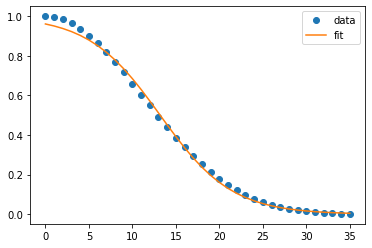

In [14]:
def sigmoid(x, a, b):
  return 1.0 / (1.0 + np.exp(-a*(x-b)))

xdata = [i * 100 for i in st_dev_range]
ydata = [i / median[0] for i in median]

fit_and_plot(sigmoid, xdata, ydata)

[1.08021563e-01 3.75332607e+03]


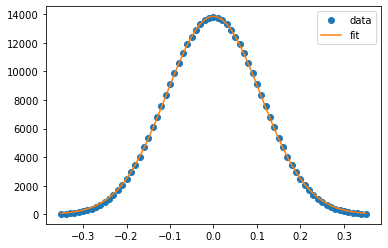

In [15]:
def normal(x, dev, a):
    return ( a / (dev * (2 * math.pi) ** 0.5)) * np.exp(-(x ** 2) / (2 * (dev ** 2)))

x_reflected = np.concatenate((-1 * st_dev_range[len(st_dev_range):0:-1], st_dev_range))
y_reflected = np.concatenate((median[len(median):0:-1], median)) 

fit_and_plot(normal, x_reflected, y_reflected)

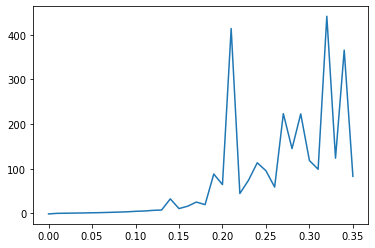

In [16]:
plt.plot(st_dev_range, skew)
plt.show()